In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns


loan_file = pd.read_csv(".\\loan\\loan.csv")

C:\Users\sachi\AppData\Local\Temp\ipykernel_17852\3265619948.py:7: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_file = pd.read_csv(".\\loan\\loan.csv")


## 1. Problem Statement ##

Problem to be solved: Identify patterns based on the columns which would be used to reject/deny loans, reduce the loan amount or charge higher interest rate.

## 2. Data Provided ##

The data shared is from a Consumer Finance company specializing in lending various types of loans. The data consist of 39717 rows spread across 111 columns. One of the columns indicates whether the loan is currently 

1. Ongoing
2. Fully Paid - Loan Fully paid by the Consumer
3. Charged Off - Consumer who has defaulted the loans and are marked for Collections by the Company.

In [2]:

loan_file.head(5)
loan_file.shape

(39717, 111)

# 3. Data Cleanup. #

#### 3.1 Identifying Null Columns ###

Based on cursory glance of the data, there are several columns which seem to have null values in the data. The first step is to identify colums which have null values.

In [3]:
type(loan_file.isnull().sum())

filtered_series = loan_file.isnull().sum()[loan_file.isnull().sum() == 39717]
print(filtered_series.shape)
filtered_series.to_csv('cols_having_empty_header.csv',header=['Count of Row Values'],index=True)


(54,)


#### 3.2 Removing Null-valued columns ####

There are over 54 columns which seem to have null values. The first step is to remove these columns as they do not contribute to analysis.
Throughout the course of analysis,  a CSV file is generated to view the output and to assess the progress. 

In [4]:
loan_file.dropna(axis=1,how='all',inplace=True)
loan_file.shape
total_length = len(loan_file)

# loan_file.columns[]
print((loan_file.columns[(loan_file.isnull().sum()/total_length) > 0.75]).value_counts())
print((loan_file.columns[(loan_file.isnull().sum()/total_length) > 0.50]).value_counts())
print((loan_file.columns[(loan_file.isnull().sum()/total_length) > 0.25]).value_counts())

loan_file.drop(columns=loan_file.columns[(loan_file.isnull().sum()/total_length) > 0.50],inplace=True)
print(loan_file.shape)
loan_file.to_csv(".\\iteration_1.csv")

mths_since_last_record    1
next_pymnt_d              1
Name: count, dtype: int64
mths_since_last_delinq    1
mths_since_last_record    1
next_pymnt_d              1
Name: count, dtype: int64
desc                      1
mths_since_last_delinq    1
mths_since_last_record    1
next_pymnt_d              1
Name: count, dtype: int64
(39717, 54)


#### 3.3 Unique valued Columns ####

There are several columns which have unique values - these do not contribute to any analaysis due to invariant nature of data. The next step is to identify the list of columns and delete them.

In [5]:
unique_count_of_values = loan_file.nunique()
list_of_unique_count_of_values = unique_count_of_values[unique_count_of_values == 1].index.tolist()

print(list_of_unique_count_of_values)

# loan_file.drop(columns=['pymnt_plan','url','desc','initial_list_status','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'],inplace=True)


loan_file.drop(columns=list_of_unique_count_of_values,inplace=True)
print(loan_file.shape)

loan_file.to_csv(".\\iteration_2.csv")

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']
(39717, 45)


#### 3.4 Removal of additional columns. ####

Upon visual analysis of columns, there are several columns which does not aid the analysis. Deleting rows which are descriptive and which does not contribute to identification.

| Field Name | Remarks |
| -------- | -------- |
| member_id | We shall retain id for reference purpose. Assumption - member_id will be retrieved from id |
| emp_title | Descriptive. Does not seem to contribute. |
| emp_length | Descriptive. Does not seem to contribute. |
| title | Descriptive. Does not seem to contribute. |
| last_credit_pull_d | The most recent month LC pulled credit for this loan - Does not contribute towards analysis.. |
| last_pymnt_amnt |  Last total payment amount received - Does not contribute towards analysis.|
| last_pymnt_d | Last month payment was received - Does not contribute towards analysis. |
| collection_recovery_fee | post charge off collection fee - Does not contribute towards analysis. |
| earliest_cr_line | The month the borrower's earliest reported credit line was opened - Does not contribute towards analysis.|
| addr_state | The state provided by the borrower in the loan application - All the states are allowed . |
| Zip Code| The first 3 numbers of the zip code provided by the borrower in the loan application.  Removed to prevent redlining and bias from the model. |
| issue_d |  The month which the loan was funded- Does not contribute towards analysis.|
| funded_amnt |  The total amount committed to that loan at that point in time.|
| funded_amnt_inv |  The total amount committed by investors for that loan at that point in time..|
| verification_status |  Indicates if income was verified by LC, not verified, or if the income source was verified.|
|url| URL for the LC page with listing data - Does not contribute to analysis|
|desc| Loan description provided by the borrower - Does not contribute to analysis|
|total_rec_late_fee|Late fees received to date - Does not contribute to analysis|
|total_rec_prncp|Principal received to date - Does not contribute to analysis|
|total_rec_int|Interest received to date - Does not contribute to analysis|
|out_prncp|Remaining outstanding principal for total amount funded - Does not contribute to analysis|
|out_prncp_inv|Remaining outstanding principal for portion of total amount funded by investors - Does not contribute to analysis|
|total_pymnt|Payments received to date for total amount funded - Does not contribute to analysis|
|total_pymnt_inv|Payments received to date for portion of total amount funded by investors - Does not contribute to analysis|







In [6]:
loan_file.drop(columns=['member_id','emp_title','emp_length','title','last_credit_pull_d','last_pymnt_amnt','last_pymnt_d','collection_recovery_fee','earliest_cr_line','addr_state','zip_code','issue_d','funded_amnt','funded_amnt_inv','verification_status','total_rec_late_fee','total_rec_prncp','total_rec_int','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','url','desc'],inplace=True)
print(loan_file.shape)
loan_file.to_csv(".\\iteration_3.csv")
# print(loan_file.tail(0))

(39717, 21)
Empty DataFrame
Columns: [id, loan_amnt, term, int_rate, installment, grade, sub_grade, home_ownership, annual_inc, loan_status, purpose, dti, delinq_2yrs, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, recoveries, pub_rec_bankruptcies]
Index: []

[0 rows x 21 columns]


#### 3.5 Remove In-Progress Loans from Analysis ####
Identify and remove entries which are ongoing. These will not contribute to the analysis.

At the end of this exercise, the data will contain only loans which are 'Charged Off' or 'Fully Paid'.

In [7]:
loan_file = loan_file[loan_file['loan_status'] != 'Current']
loan_file.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38577 non-null  int64  
 1   loan_amnt             38577 non-null  int64  
 2   term                  38577 non-null  object 
 3   int_rate              38577 non-null  object 
 4   installment           38577 non-null  float64
 5   grade                 38577 non-null  object 
 6   sub_grade             38577 non-null  object 
 7   home_ownership        38577 non-null  object 
 8   annual_inc            38577 non-null  float64
 9   loan_status           38577 non-null  object 
 10  purpose               38577 non-null  object 
 11  dti                   38577 non-null  float64
 12  delinq_2yrs           38577 non-null  int64  
 13  inq_last_6mths        38577 non-null  int64  
 14  open_acc              38577 non-null  int64  
 15  pub_rec               38

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,loan_status,...,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,recoveries,pub_rec_bankruptcies
0,1077501,5000,36 months,10.65%,162.87,B,B2,RENT,24000.0,Fully Paid,...,27.65,0,1,3,0,13648,83.70%,9,0.00,0.0
1,1077430,2500,60 months,15.27%,59.83,C,C4,RENT,30000.0,Charged Off,...,1.00,0,5,3,0,1687,9.40%,4,117.08,0.0
2,1077175,2400,36 months,15.96%,84.33,C,C5,RENT,12252.0,Fully Paid,...,8.72,0,2,2,0,2956,98.50%,10,0.00,0.0
3,1076863,10000,36 months,13.49%,339.31,C,C1,RENT,49200.0,Fully Paid,...,20.00,0,1,10,0,5598,21%,37,0.00,0.0
5,1075269,5000,36 months,7.90%,156.46,A,A4,RENT,36000.0,Fully Paid,...,11.20,0,3,9,0,7963,28.30%,12,0.00,0.0


id                      False
loan_amnt               False
term                    False
int_rate                False
installment             False
grade                   False
sub_grade               False
home_ownership          False
annual_inc              False
loan_status             False
purpose                 False
dti                     False
delinq_2yrs             False
inq_last_6mths          False
open_acc                False
pub_rec                 False
revol_bal               False
revol_util               True
total_acc               False
recoveries              False
pub_rec_bankruptcies     True
dtype: bool


#### 3.6 Identify columns with empty vlaues and fill values. ####

From the remaining data, identify columns which have empty cells. The next step is to identify the appropriate data to be fill the values. For this, we shall use the mode to identify and populate the values.

In [33]:
print(loan_file.isna().sum() > 0)
print(loan_file['revol_util'].mode())
print(loan_file['pub_rec_bankruptcies'].mode())

loan_file['revol_util'].fillna(loan_file['revol_util'].mode()[0],inplace=True)
loan_file['pub_rec_bankruptcies'].fillna(loan_file['pub_rec_bankruptcies'].mode()[0])

id                      False
loan_amnt               False
term                    False
int_rate                False
installment             False
grade                   False
sub_grade               False
home_ownership          False
annual_inc              False
loan_status             False
purpose                 False
dti                     False
delinq_2yrs             False
inq_last_6mths          False
open_acc                False
pub_rec                 False
revol_bal               False
revol_util              False
total_acc               False
recoveries              False
pub_rec_bankruptcies     True
dti_bin                 False
loan_amnt_bin           False
annual_inc_bin          False
total_acc_bin           False
dtype: bool
0    0%
Name: revol_util, dtype: object
0    0.0
Name: pub_rec_bankruptcies, dtype: float64


0        0.0
1        0.0
2        0.0
3        0.0
5        0.0
        ... 
39712    0.0
39713    0.0
39714    0.0
39715    0.0
39716    0.0
Name: pub_rec_bankruptcies, Length: 38577, dtype: float64

In [12]:
loan_file['term'].value_counts()

loan_amnt_quantile = loan_file['loan_amnt'].quantile([0.5,0.75,0.8,.85,.9,.95,.99])



<Axes: xlabel='loan_status', ylabel='count'>

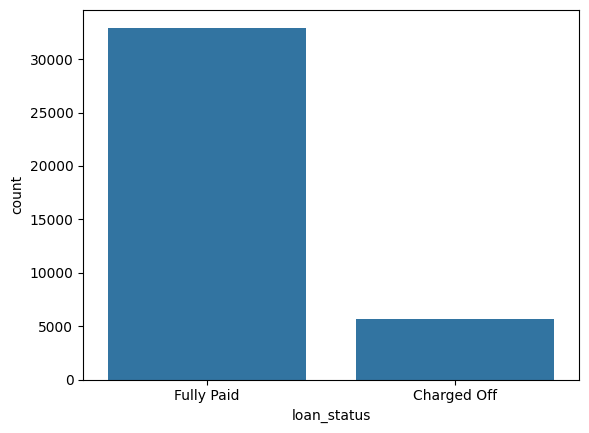

In [13]:
sns.countplot(x='loan_status',data=loan_file)

In [14]:
charged_off_file = loan_file[loan_file['loan_status']=='Charged Off']


charged_off_file['term'].apply(lambda x:x.replace('36 months','36'))
charged_off_file['term'].apply(lambda x:x.replace('60 months','60'))

print(charged_off_file.head(2))

loan_file.to_csv(".\\iteration_4.csv")


        id  loan_amnt        term int_rate  installment grade sub_grade  \
1  1077430       2500   60 months   15.27%        59.83     C        C4   
8  1071795       5600   60 months   21.28%       152.39     F        F2   

  home_ownership  annual_inc  loan_status  ...   dti  delinq_2yrs  \
1           RENT     30000.0  Charged Off  ...  1.00            0   
8            OWN     40000.0  Charged Off  ...  5.55            0   

   inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util total_acc  \
1               5         3        0       1687       9.40%         4   
8               2        11        0       5210      32.60%        13   

   recoveries  pub_rec_bankruptcies  
1      117.08                   0.0  
8      189.06                   0.0  

[2 rows x 21 columns]


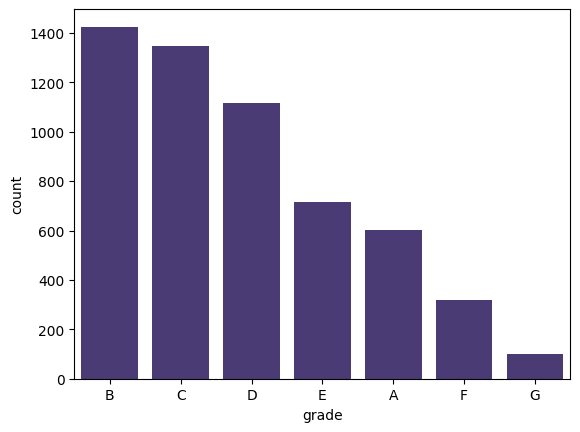

In [15]:
# sns.boxplot(x='sub_grade',data=charged_off_file)
sns.set_palette("viridis")
sns.countplot(x='grade',data=charged_off_file,order=charged_off_file['grade'].value_counts().index)
plt.show()

<Axes: xlabel='grade', ylabel='count'>

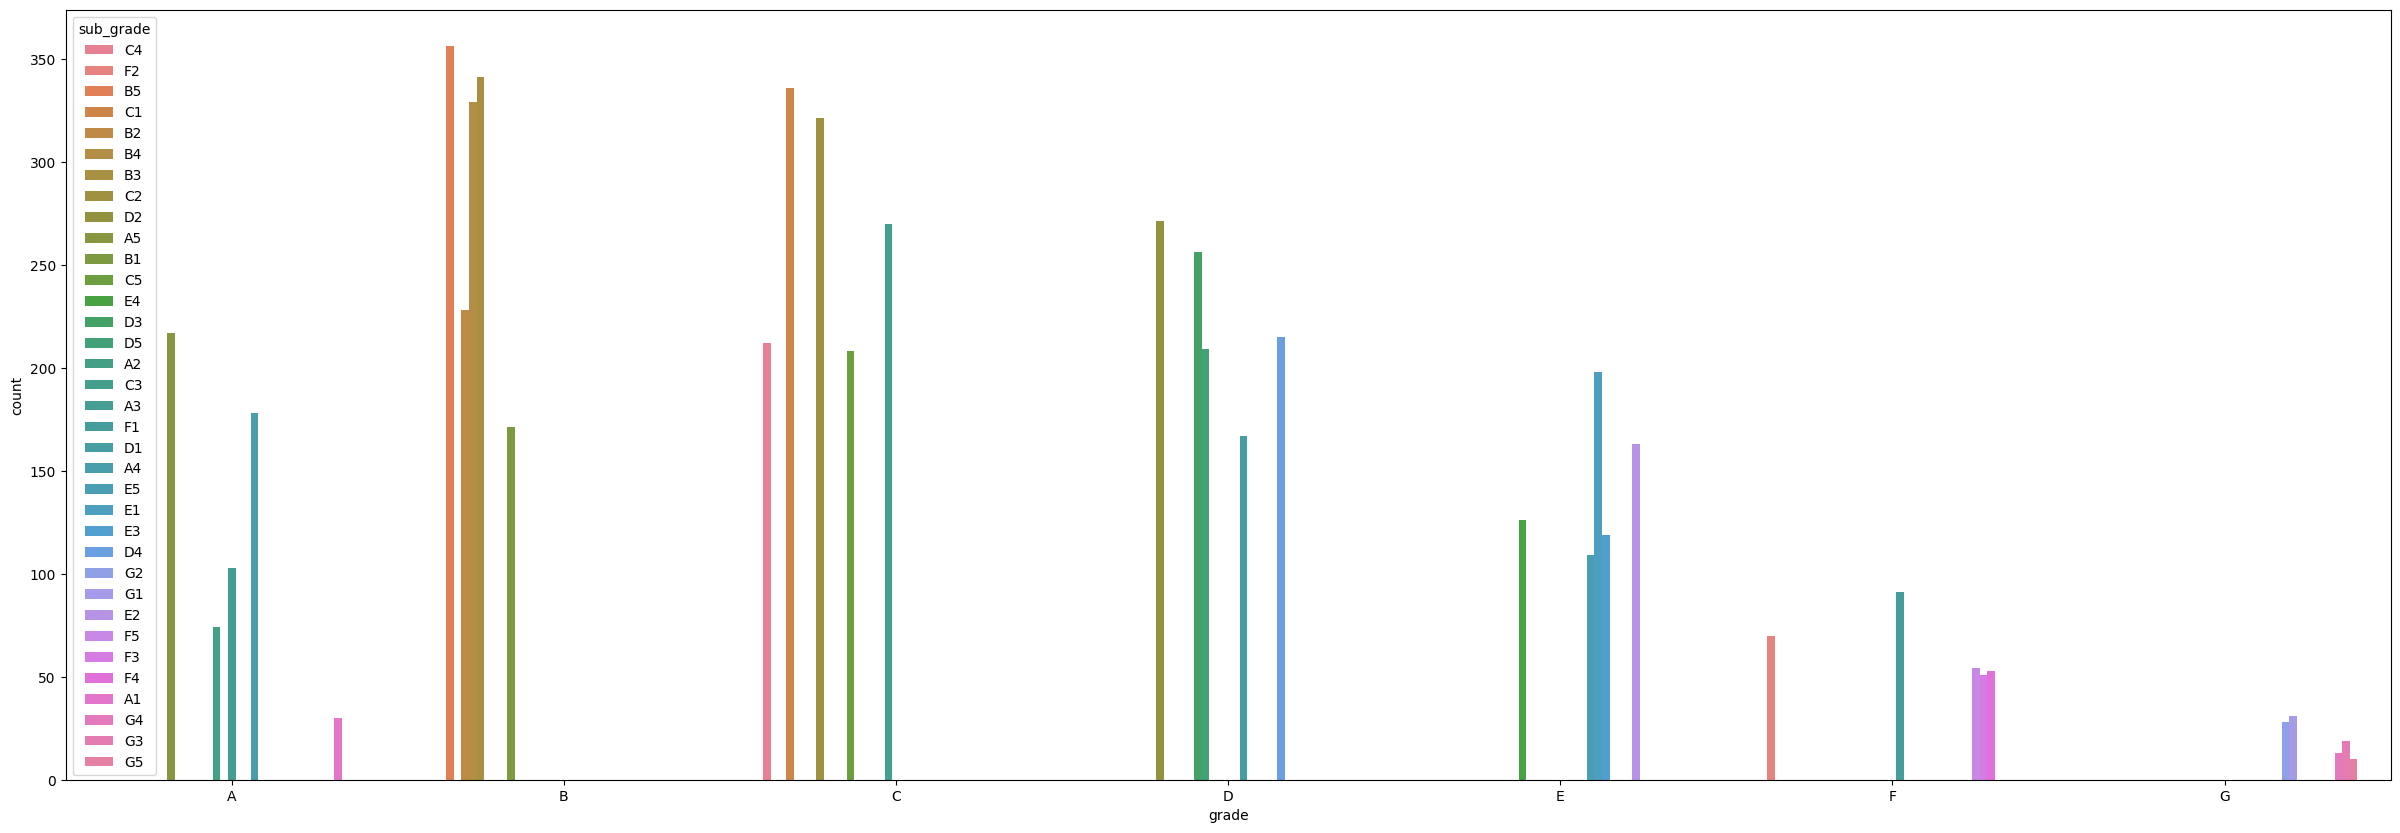

In [16]:
fig, ax = plt.subplots(figsize=(30,10))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data =charged_off_file)

<Axes: xlabel='home_ownership', ylabel='count'>

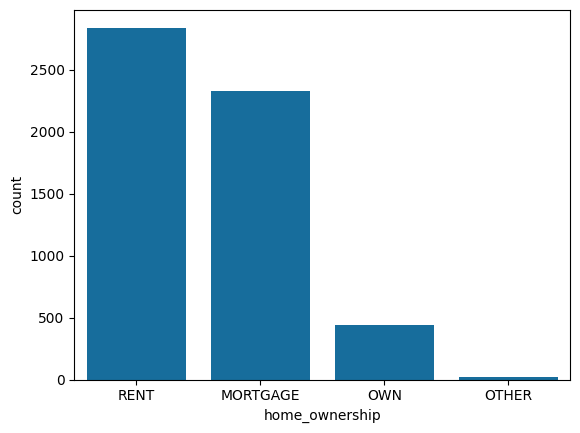

In [17]:
sns.countplot(x = 'home_ownership',data =charged_off_file, order=charged_off_file['home_ownership'].value_counts().index)

<Axes: xlabel='purpose', ylabel='count'>

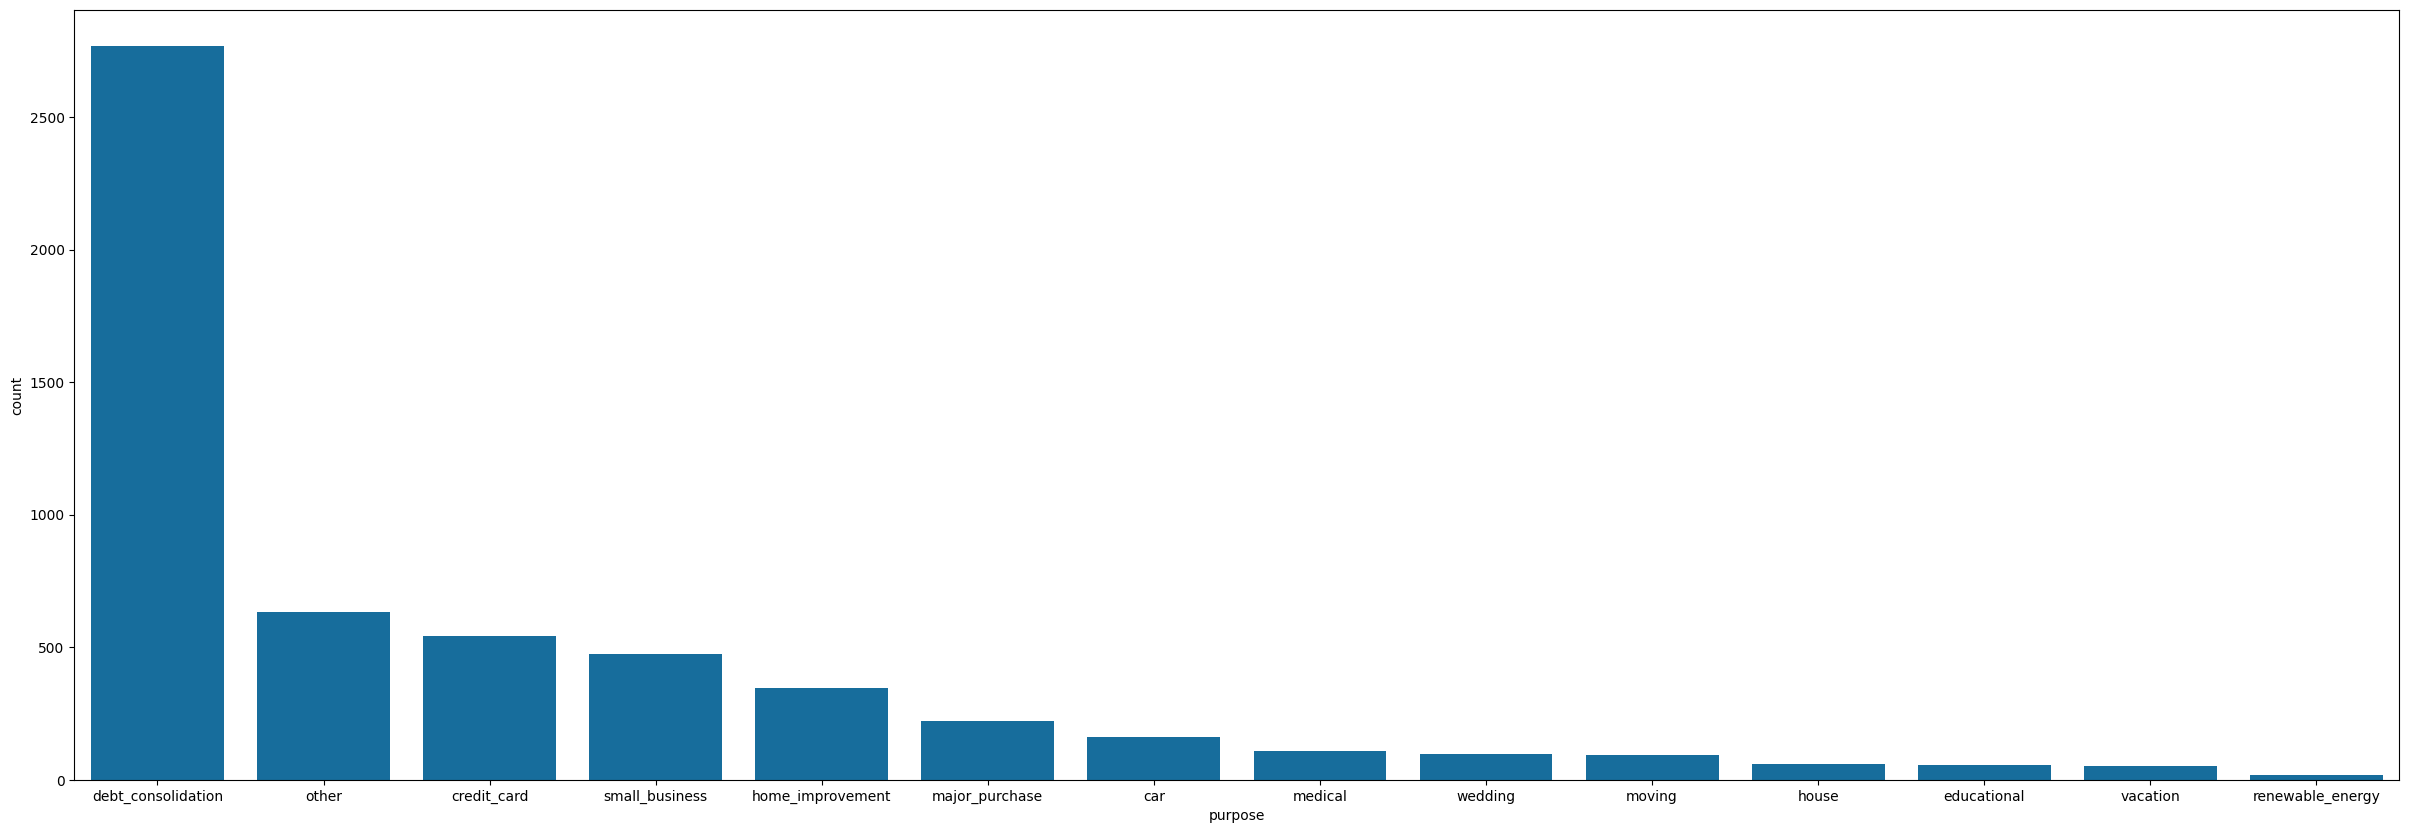

In [18]:
fig, ax = plt.subplots(figsize=(30,10))
sns.set_palette('colorblind')
sns.countplot(x = 'purpose',data =charged_off_file, order=charged_off_file['purpose'].value_counts().index)

<Axes: xlabel='delinq_2yrs', ylabel='count'>

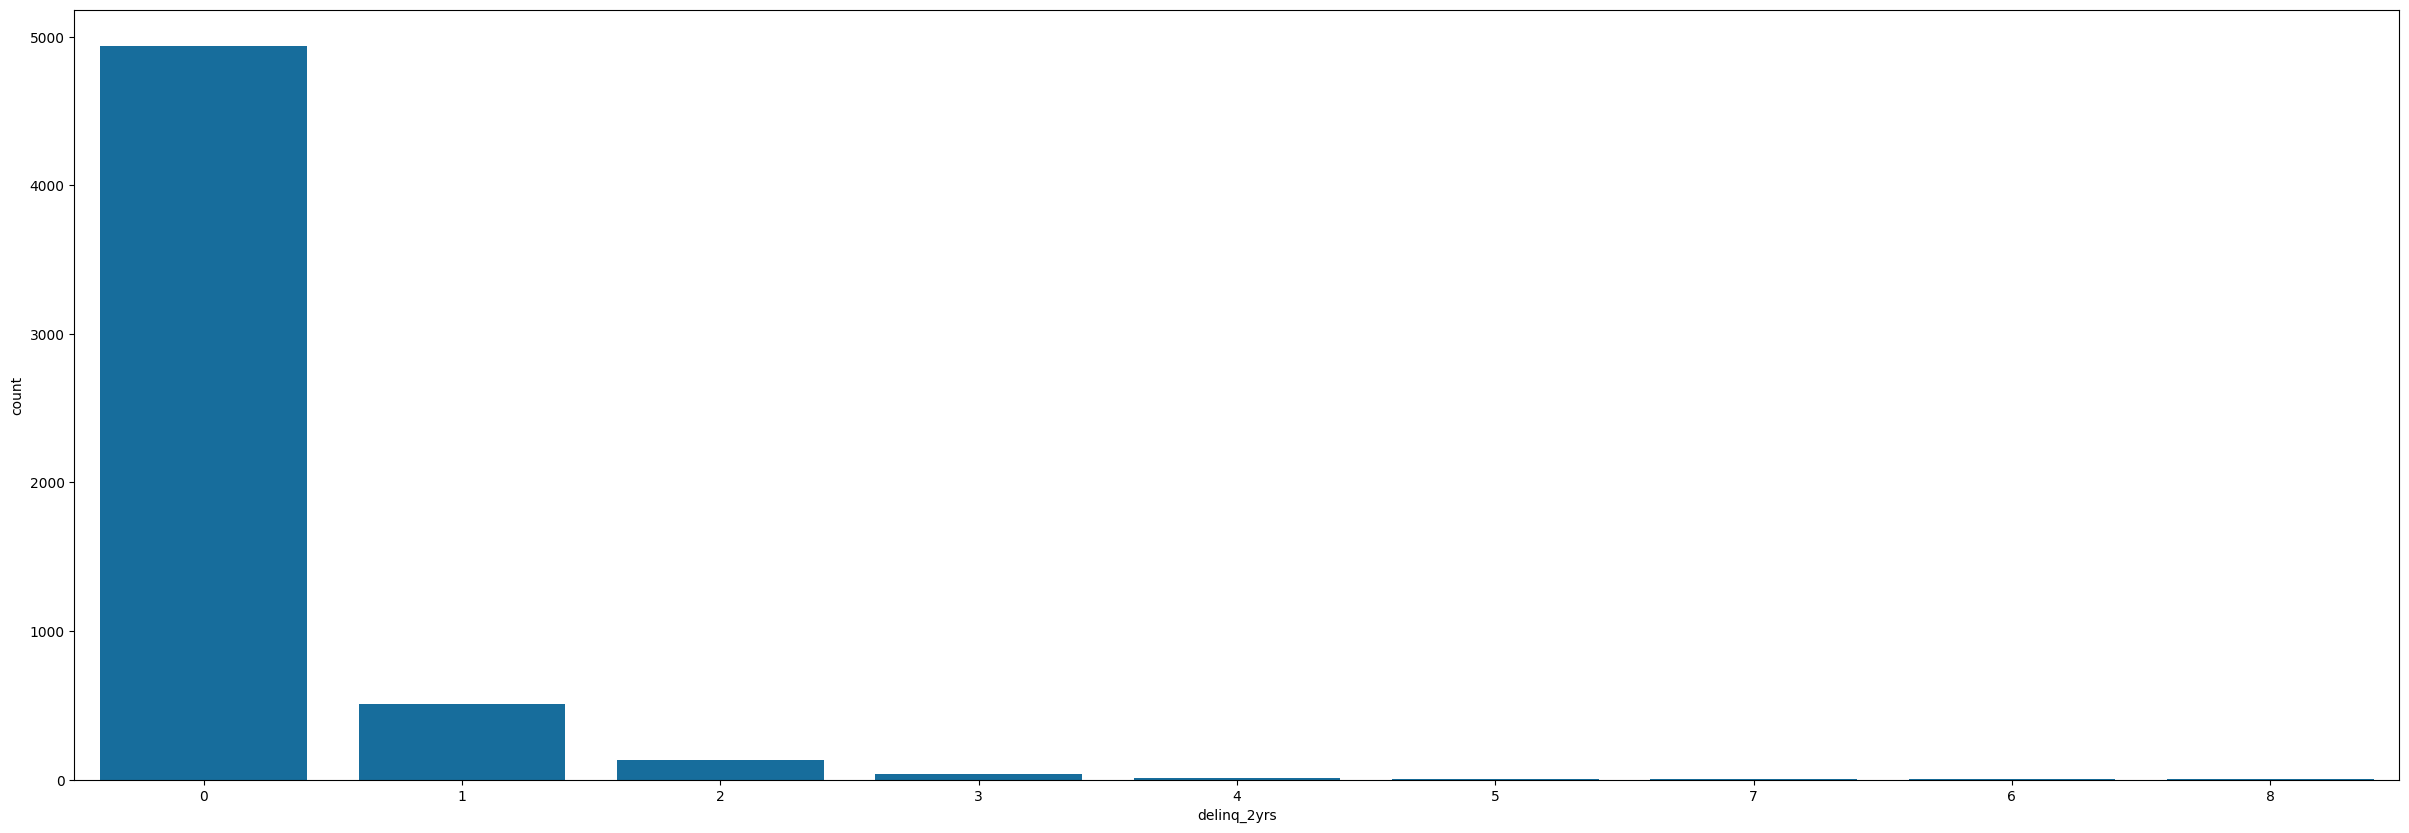

In [19]:
fig, ax = plt.subplots(figsize=(30,10))
sns.set_palette('colorblind')
sns.countplot(x = 'delinq_2yrs',data =charged_off_file, order=charged_off_file['delinq_2yrs'].value_counts().index)

<Axes: xlabel='inq_last_6mths', ylabel='count'>

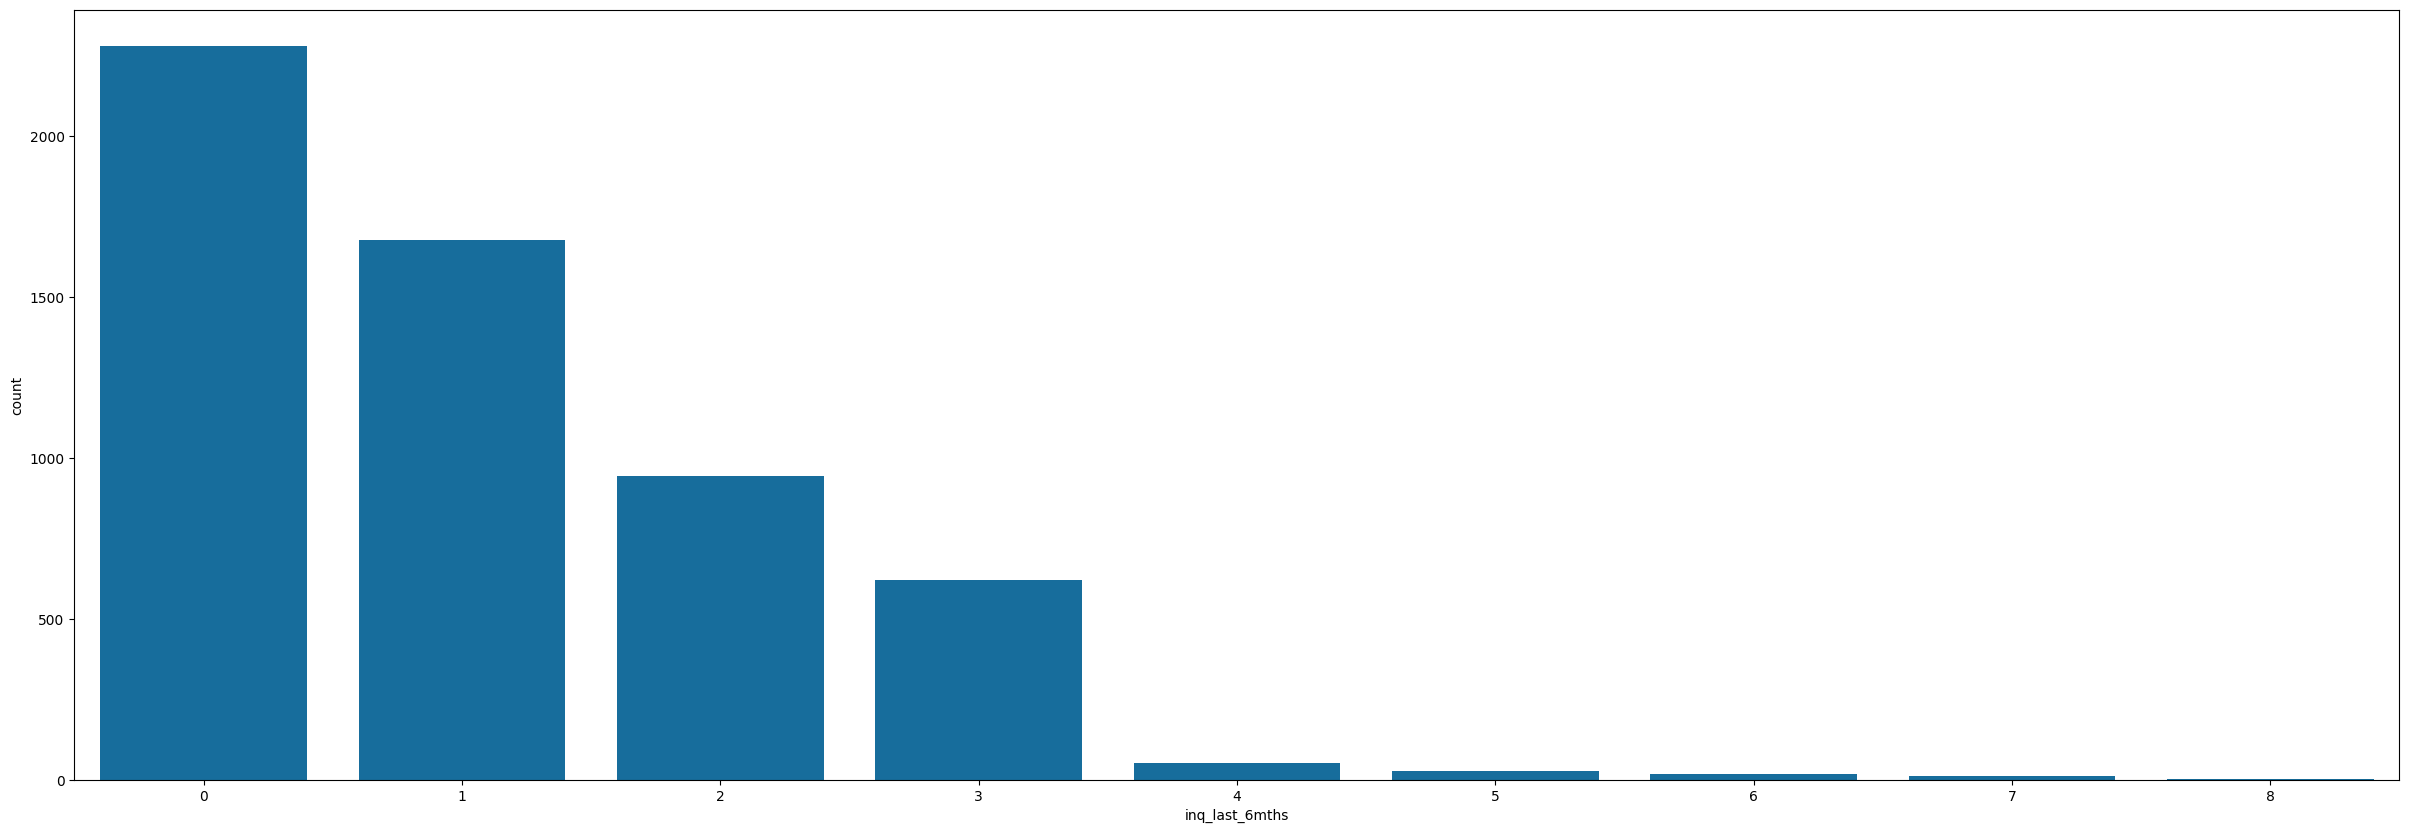

In [20]:
# print(charged_off_file.info())

fig, ax = plt.subplots(figsize=(30,10))
sns.set_palette('colorblind')
sns.countplot(x = 'inq_last_6mths',data =charged_off_file, order=charged_off_file['inq_last_6mths'].value_counts().index)

<Axes: xlabel='total_acc', ylabel='count'>

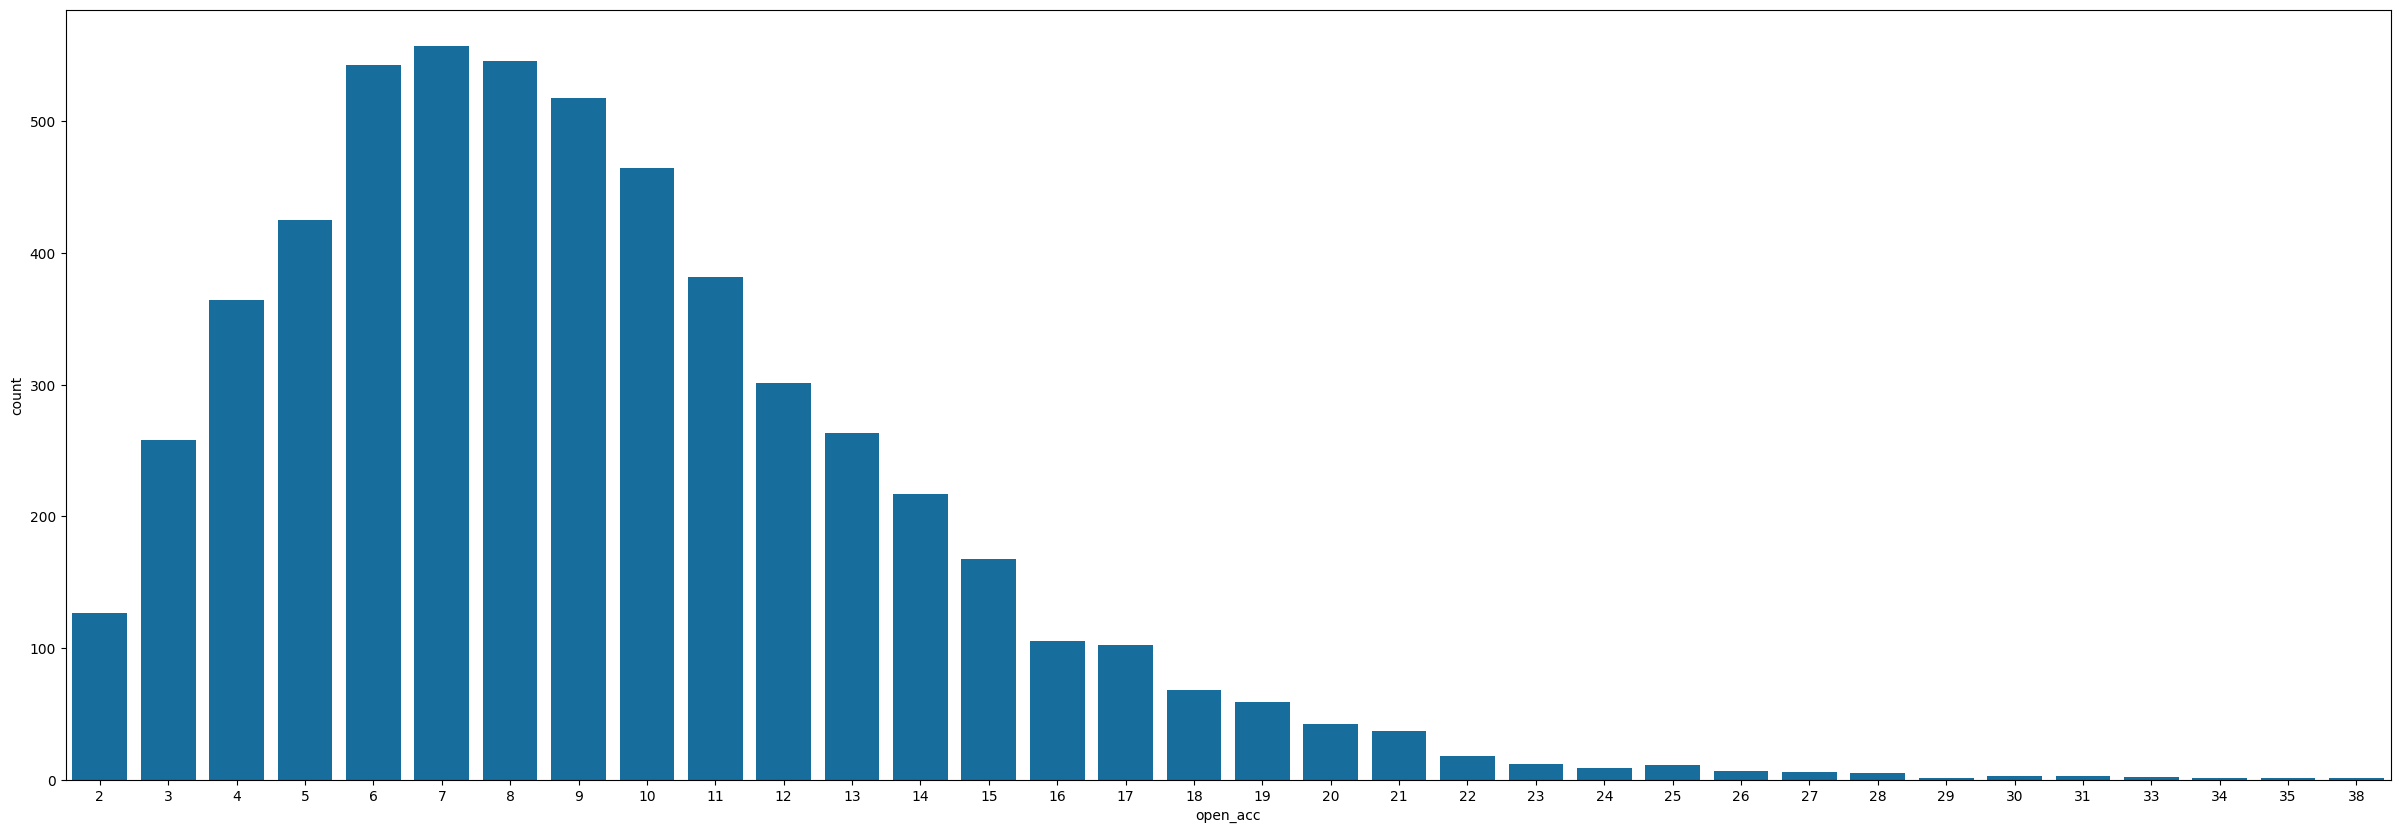

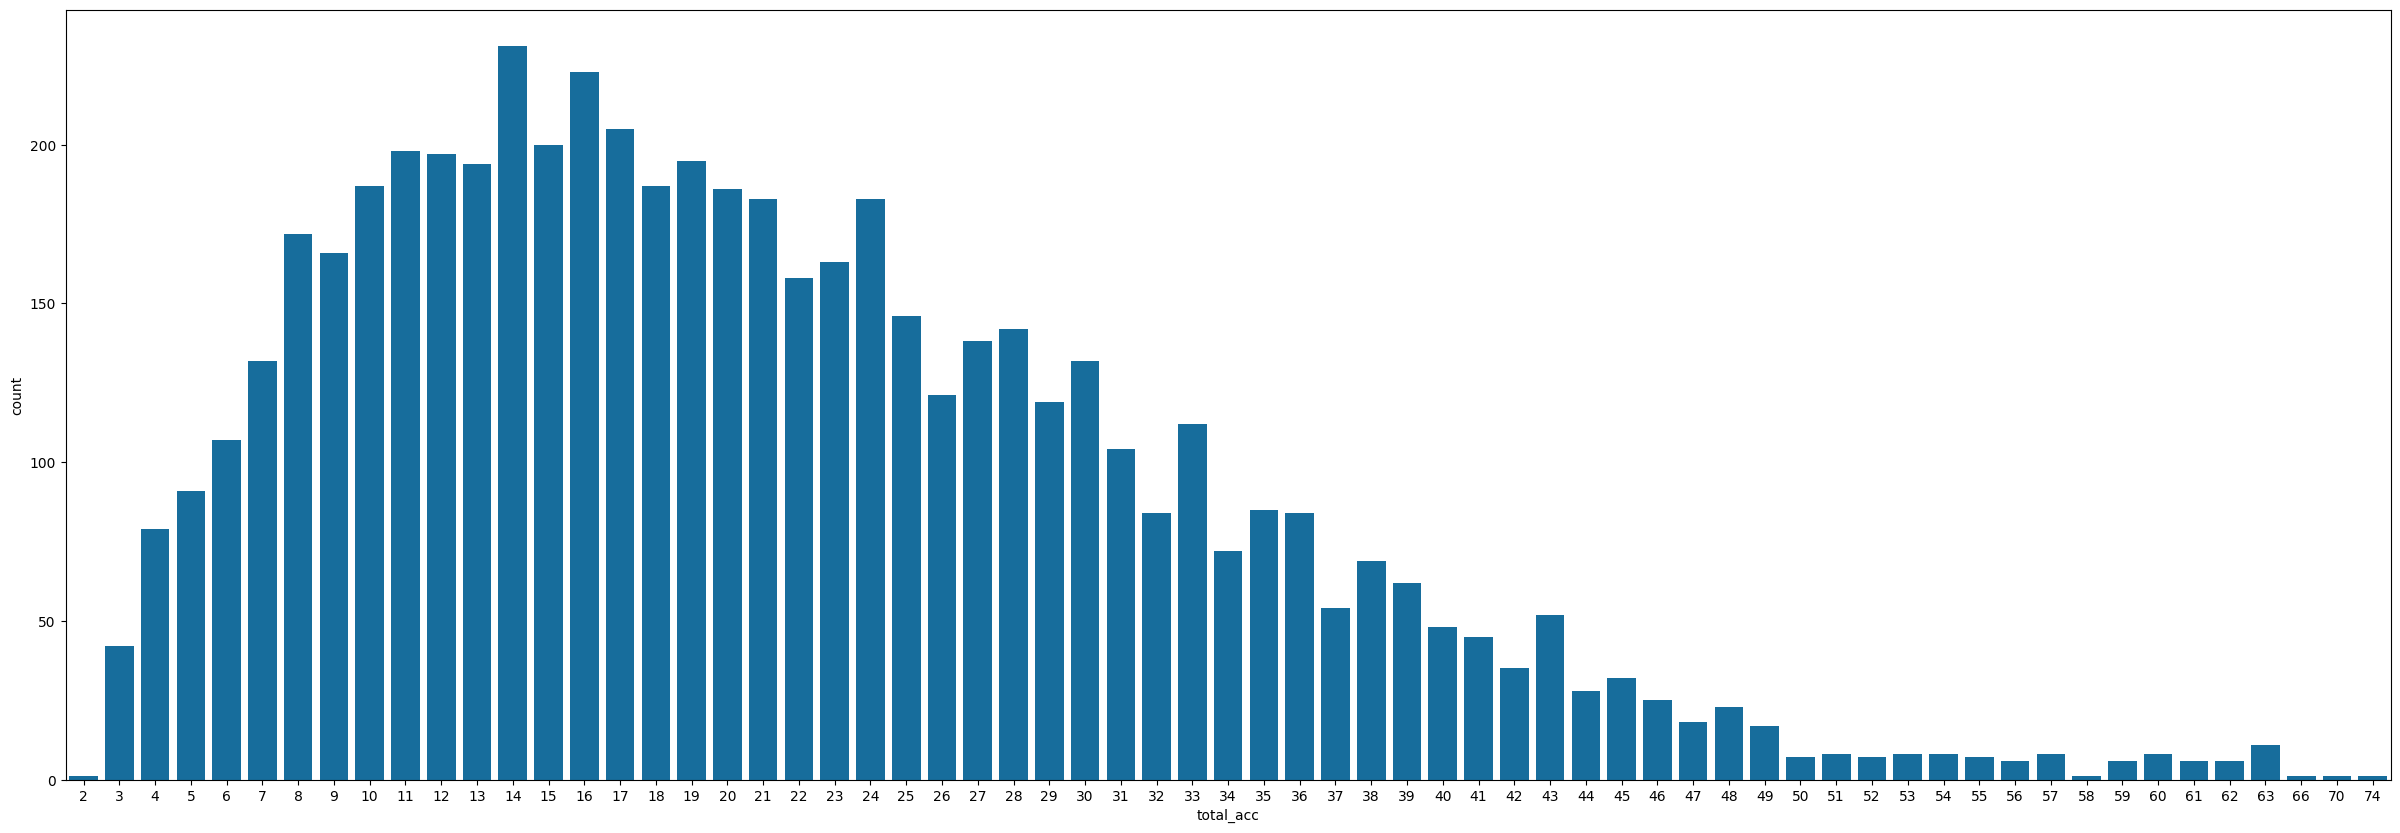

In [21]:
# print(charged_off_file.info())

fig, ax = plt.subplots(figsize=(30,10))
sns.set_palette('colorblind')
# sns.countplot(x = 'open_acc',data =charged_off_file, order=charged_off_file['open_acc'].value_counts().index)
sns.countplot(x = 'open_acc',data =charged_off_file)


# list_openacc = lambda x: print(x['open_acc'],x['open_acc'].value_counts())

# list_openacc(charged_off_file)


fig, ax = plt.subplots(figsize=(30,10))
sns.set_palette('colorblind')
# sns.countplot(x = 'open_acc',data =charged_off_file, order=charged_off_file['open_acc'].value_counts().index)
sns.countplot(x = 'total_acc',data =charged_off_file)

#list_openacc = lambda x: print(x['total_acc'],x['total_acc'].value_counts())

# list_openacc(charged_off_file)


In [22]:
print("Loan Amount:",charged_off_file['loan_amnt'].mean(),charged_off_file['loan_amnt'].median(),charged_off_file['loan_amnt'].max(),charged_off_file['loan_amnt'].min())
print("Interest Rate:",charged_off_file['int_rate'].max(),charged_off_file['int_rate'].min())
print("Annual Income:",charged_off_file['annual_inc'].mean(),charged_off_file['annual_inc'].median(),charged_off_file['annual_inc'].max(),charged_off_file['annual_inc'].min())
print("DTI:",charged_off_file['dti'].mean(),charged_off_file['dti'].median(),charged_off_file['dti'].max(),charged_off_file['dti'].min())
print("Total Number of Accounts:",charged_off_file['total_acc'].median(),charged_off_file['total_acc'].max(),charged_off_file['total_acc'].min())


Loan Amount: 12104.385107517328 10000.0 35000 900
Interest Rate: 9.99% 10.00%
Annual Income: 62427.298034476626 53000.0 1250000.0 4080.0
DTI: 14.000623778212193 14.29 29.85 0.0
Total Number of Accounts: 20.0 74 2


In [23]:
charged_off_file['dti_bin'] = pd.cut(charged_off_file['dti'], bins=6,precision =0,labels=['0-5','5-10','10-15','15-20','20-25','>25'])
charged_off_file['loan_amnt_bin'] = pd.cut(charged_off_file['loan_amnt'], bins=5,precision =0,labels=['0-7000','7000-14000','14000-21000','21000-28000','28000-35000'])
charged_off_file['annual_inc_bin'] = pd.cut(charged_off_file['annual_inc'], bins=9,precision =0,labels=['0-3000','3000-7500','7500-15000','15000-25000','25000-50000','50000-75000','75000-125000','125000-250000','250000-1250000'])
charged_off_file['total_acc_bin'] = pd.cut(charged_off_file['total_acc'], bins=8,precision =0,labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80'])
#charged_off_file['loan_amnt'] = pd.cut(charged_off_file['loan_amnt'], bins=10,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21
                                                                                                                                                                                                      


C:\Users\sachi\AppData\Local\Temp\ipykernel_17852\486757906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_file['dti_bin'] = pd.cut(charged_off_file['dti'], bins=6,precision =0,labels=['0-5','5-10','10-15','15-20','20-25','>25'])
C:\Users\sachi\AppData\Local\Temp\ipykernel_17852\486757906.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_file['loan_amnt_bin'] = pd.cut(charged_off_file['loan_amnt'], bins=5,precision =0,labels=['0-7000','7000-14000','14000-21000','21000-28000','

In [24]:
charged_off_file.to_csv(".\\iteration_5.csv")

<Axes: xlabel='dti_bin', ylabel='count'>

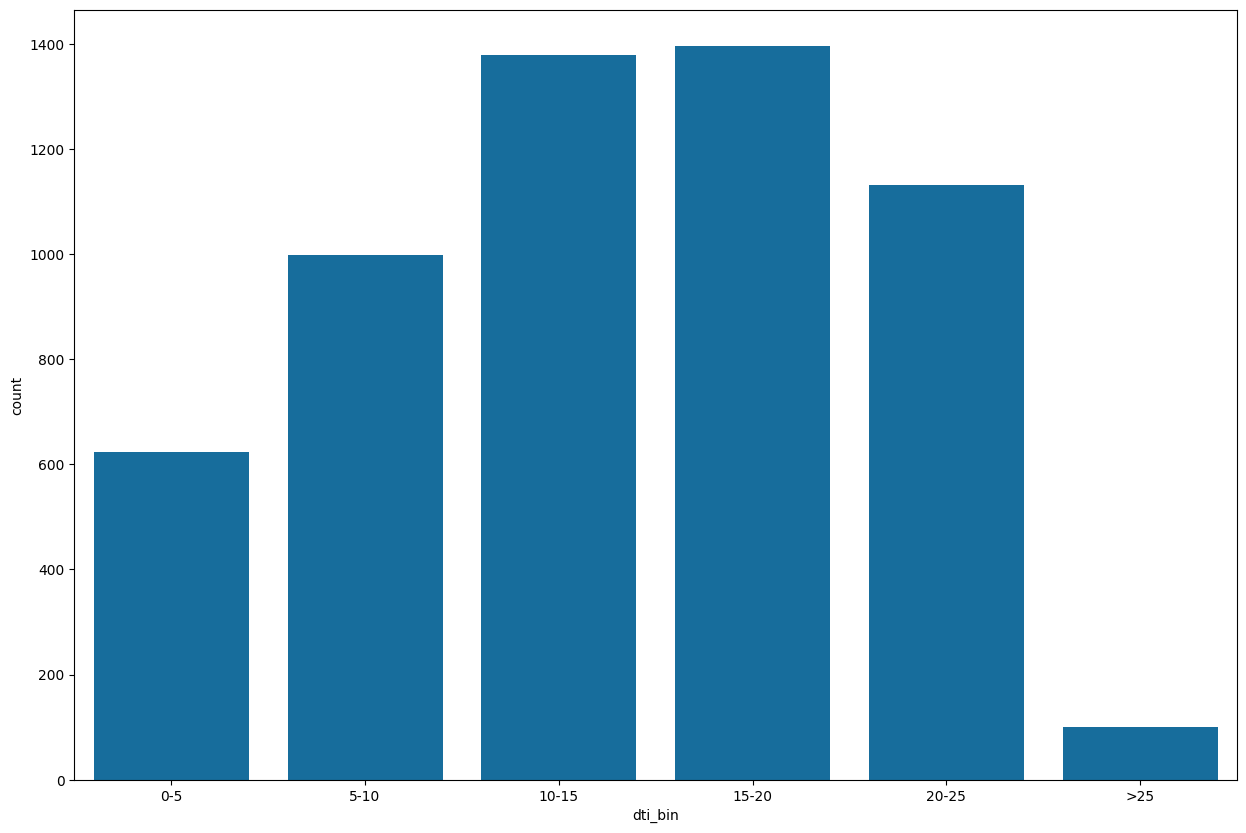

In [25]:
fig, ax = plt.subplots(figsize=(15,10))
sns.set_palette('colorblind')
# sns.countplot(x = 'open_acc',data =charged_off_file, order=charged_off_file['open_acc'].value_counts().index)
sns.countplot(x = 'dti_bin',data =charged_off_file)




<Axes: xlabel='loan_amnt_bin', ylabel='count'>

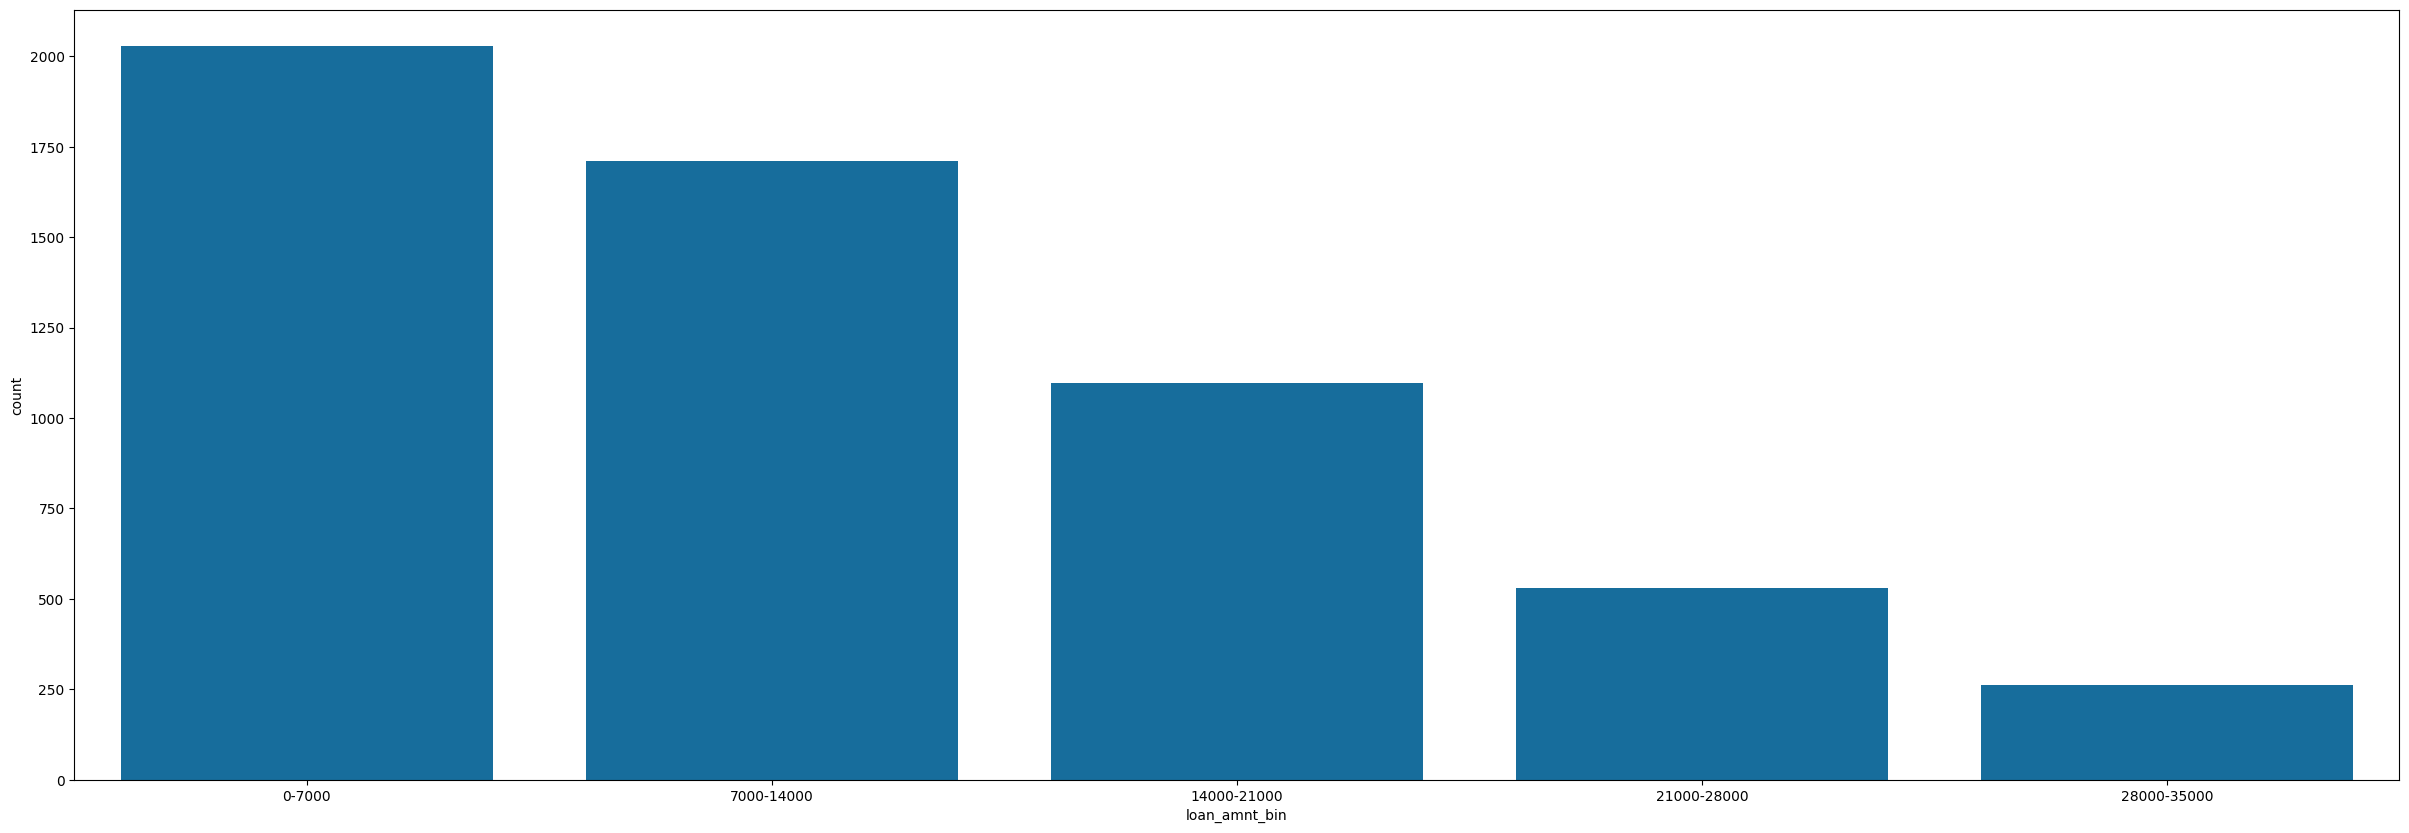

In [26]:
fig, ax = plt.subplots(figsize=(30,10))
sns.set_palette('colorblind')
# sns.countplot(x = 'open_acc',data =charged_off_file, order=charged_off_file['open_acc'].value_counts().index)
sns.countplot(x = 'loan_amnt_bin',data =charged_off_file)


<Axes: xlabel='annual_inc_bin', ylabel='count'>

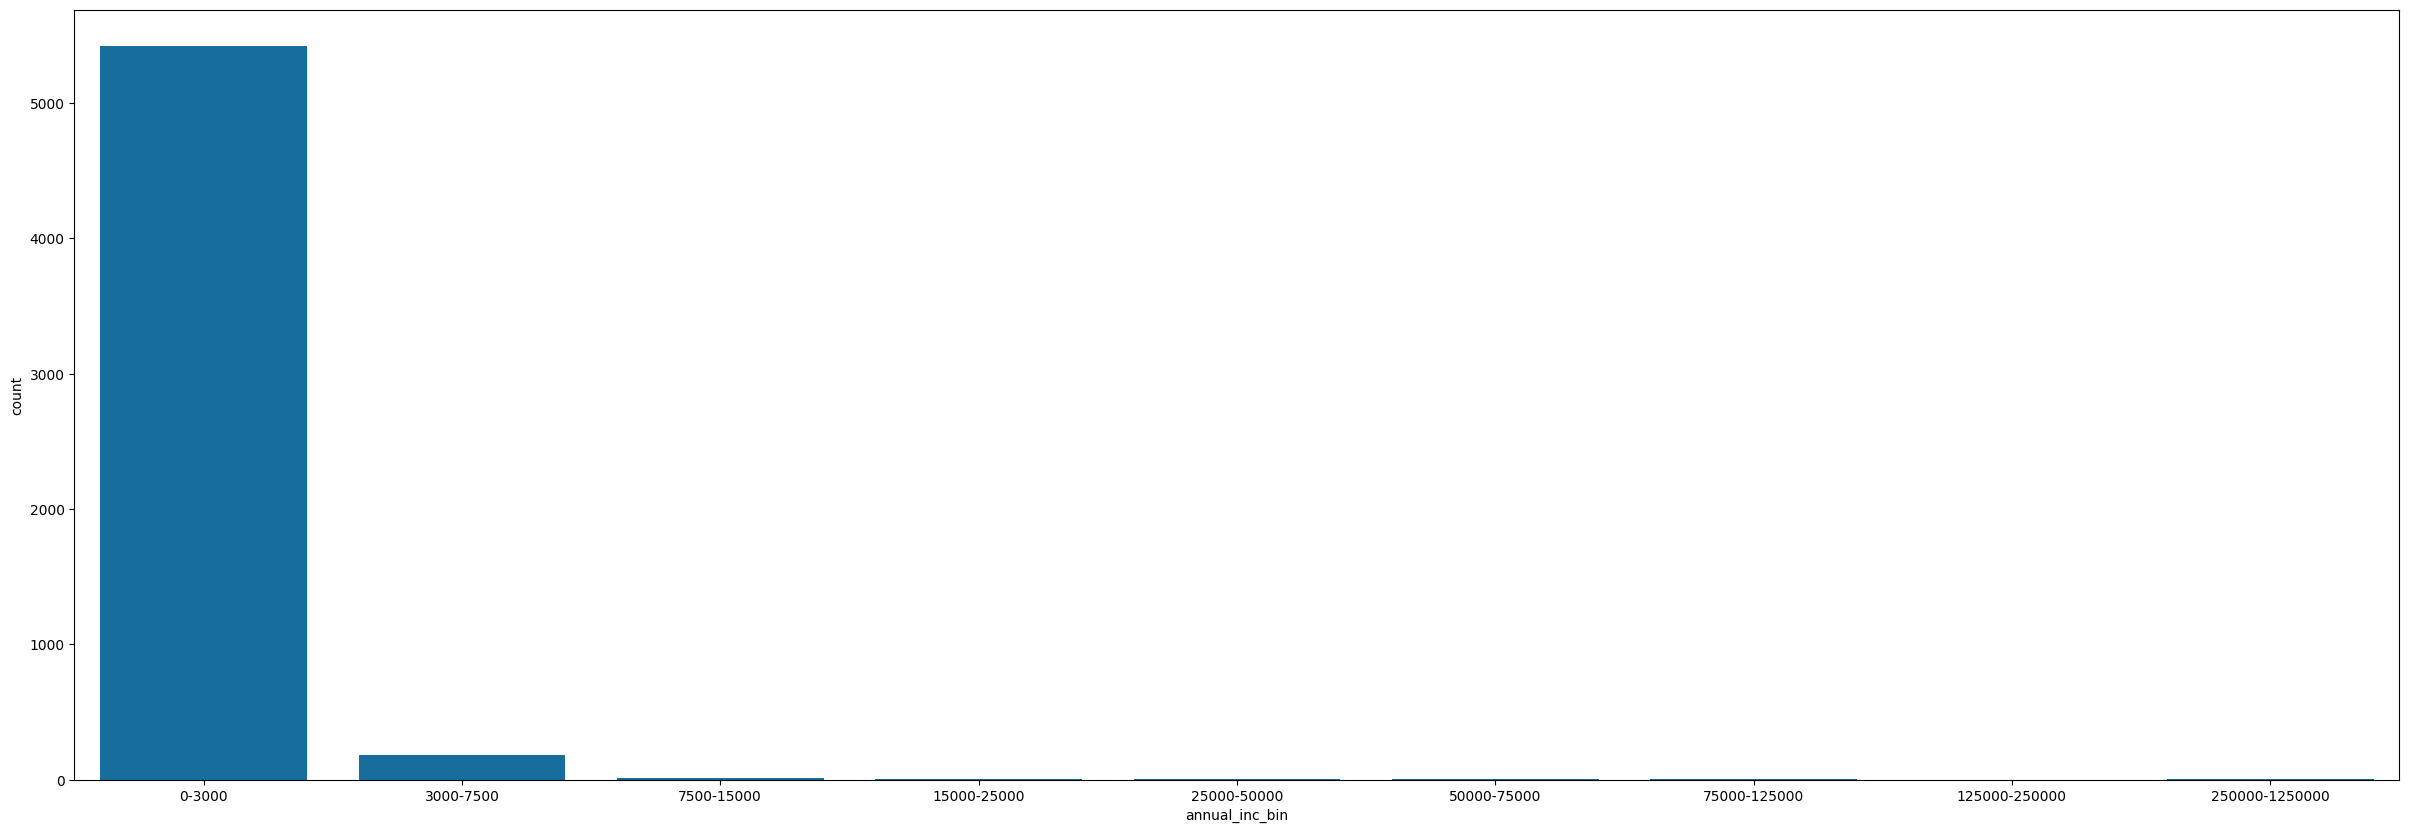

In [27]:
fig, ax = plt.subplots(figsize=(30,10))
sns.set_palette('colorblind')

# sns.countplot(x = 'open_acc',data =charged_off_file, order=charged_off_file['open_acc'].value_counts().index)
sns.countplot(x = 'annual_inc_bin',data =charged_off_file)



In [28]:
loan_file['dti_bin'] = pd.cut(loan_file['dti'], bins=6,precision =0,labels=['0-5','5-10','10-15','15-20','20-25','>25'])
loan_file['loan_amnt_bin'] = pd.cut(loan_file['loan_amnt'], bins=5,precision =0,labels=['0-7000','7000-14000','14000-21000','21000-28000','28000-35000'])
loan_file['annual_inc_bin'] = pd.cut(loan_file['annual_inc'], bins=9,precision =0,labels=['0-3000','3000-7500','7500-15000','15000-25000','25000-50000','50000-75000','75000-125000','125000-250000','250000-1250000'])
loan_file['total_acc_bin'] = pd.cut(loan_file['total_acc'], bins=8,precision =0,labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80'])


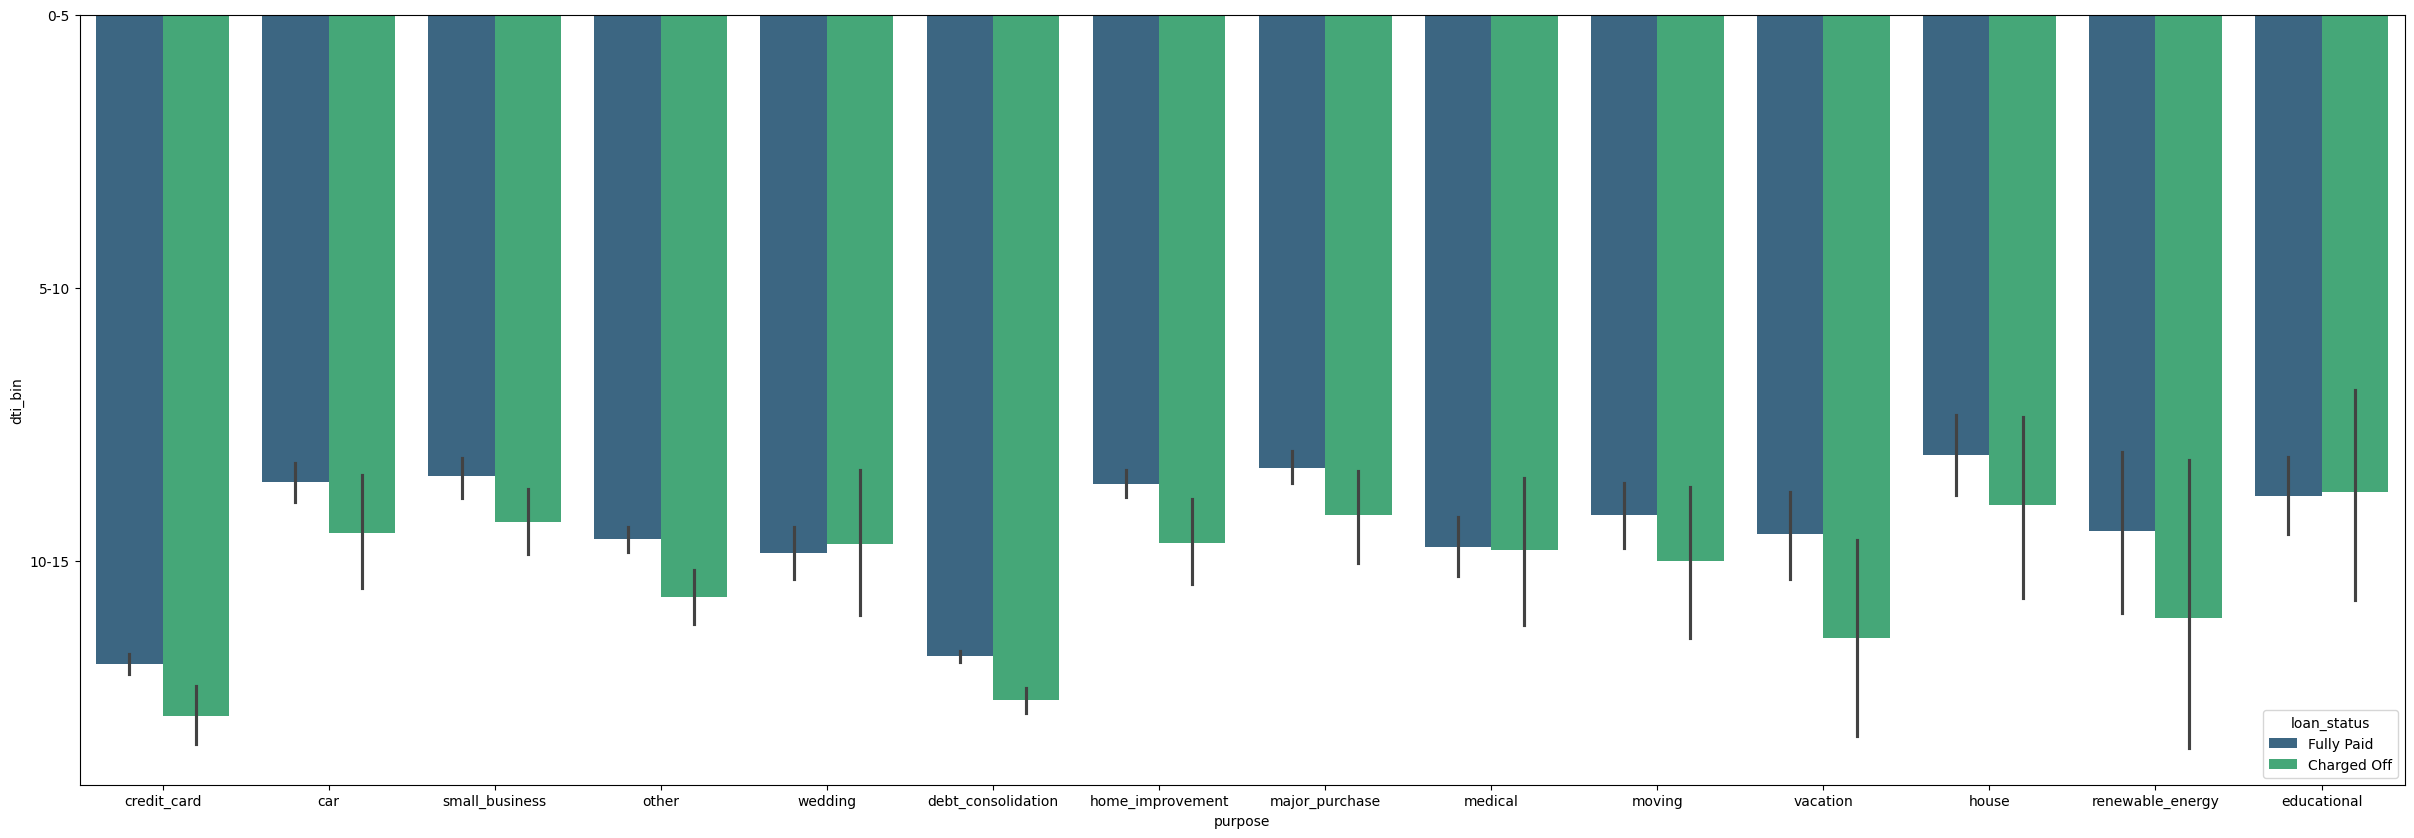

In [29]:
plt.figure(figsize=(30,10))
sns.barplot(data =loan_file,x='purpose', y='dti_bin', hue ='loan_status',palette="viridis")
plt.show()

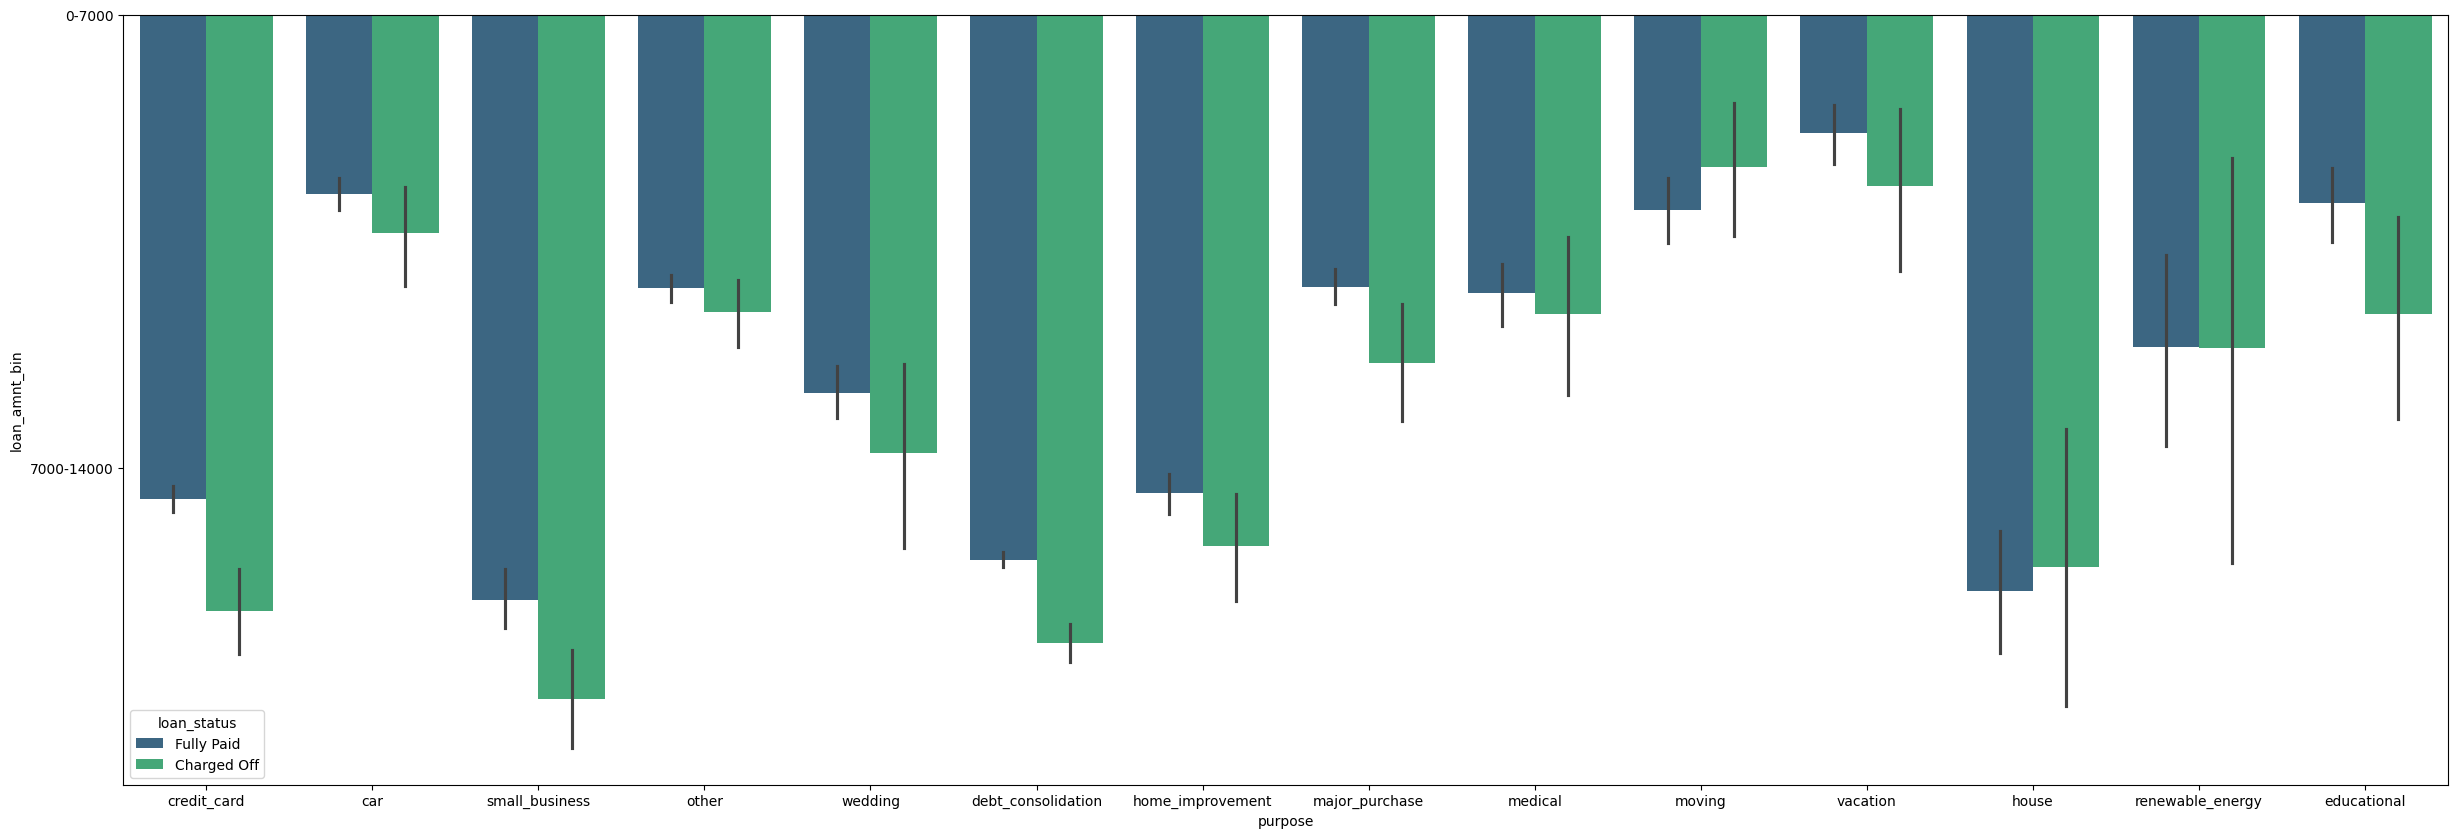

In [30]:
plt.figure(figsize=(30,10))
sns.barplot(data =loan_file,x='purpose', y='loan_amnt_bin', hue ='loan_status',palette="viridis")
plt.show()

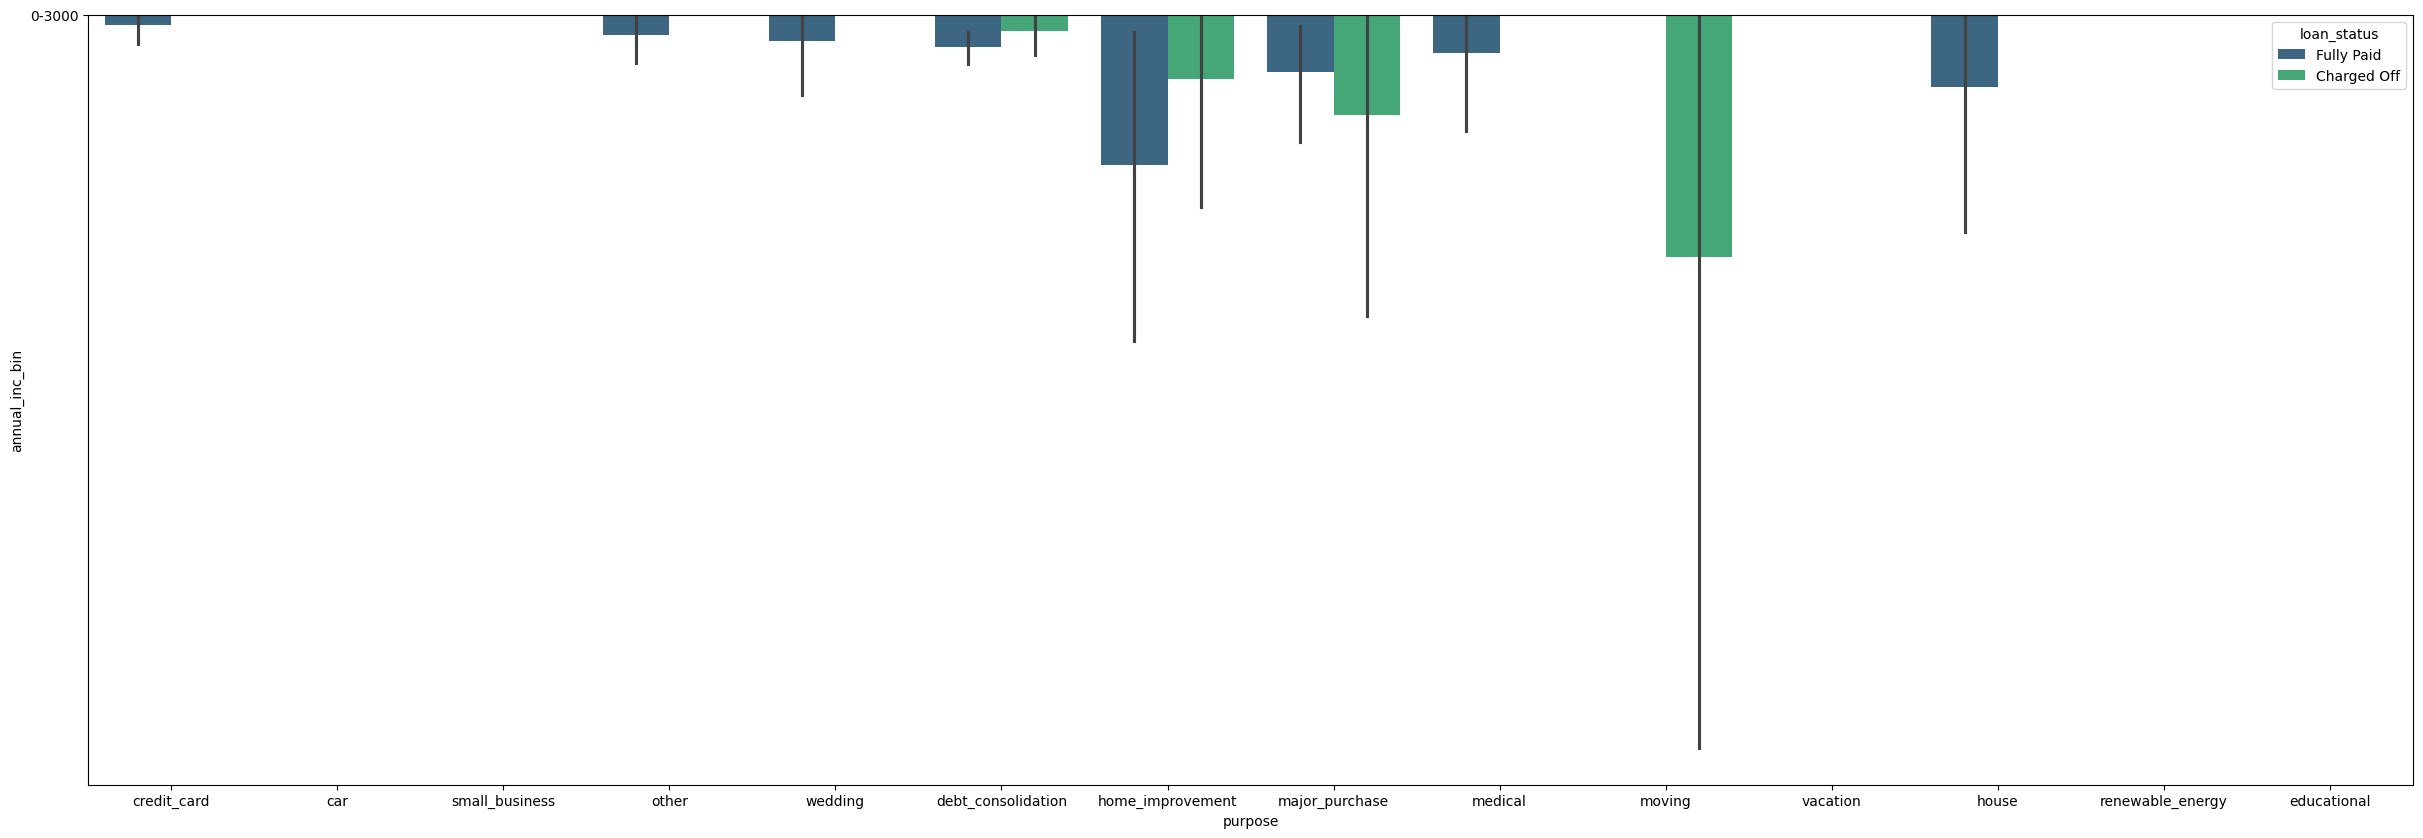

In [31]:
plt.figure(figsize=(30,10))
sns.barplot(data =loan_file,x='purpose', y='annual_inc_bin', hue ='loan_status',palette="viridis")
plt.show()

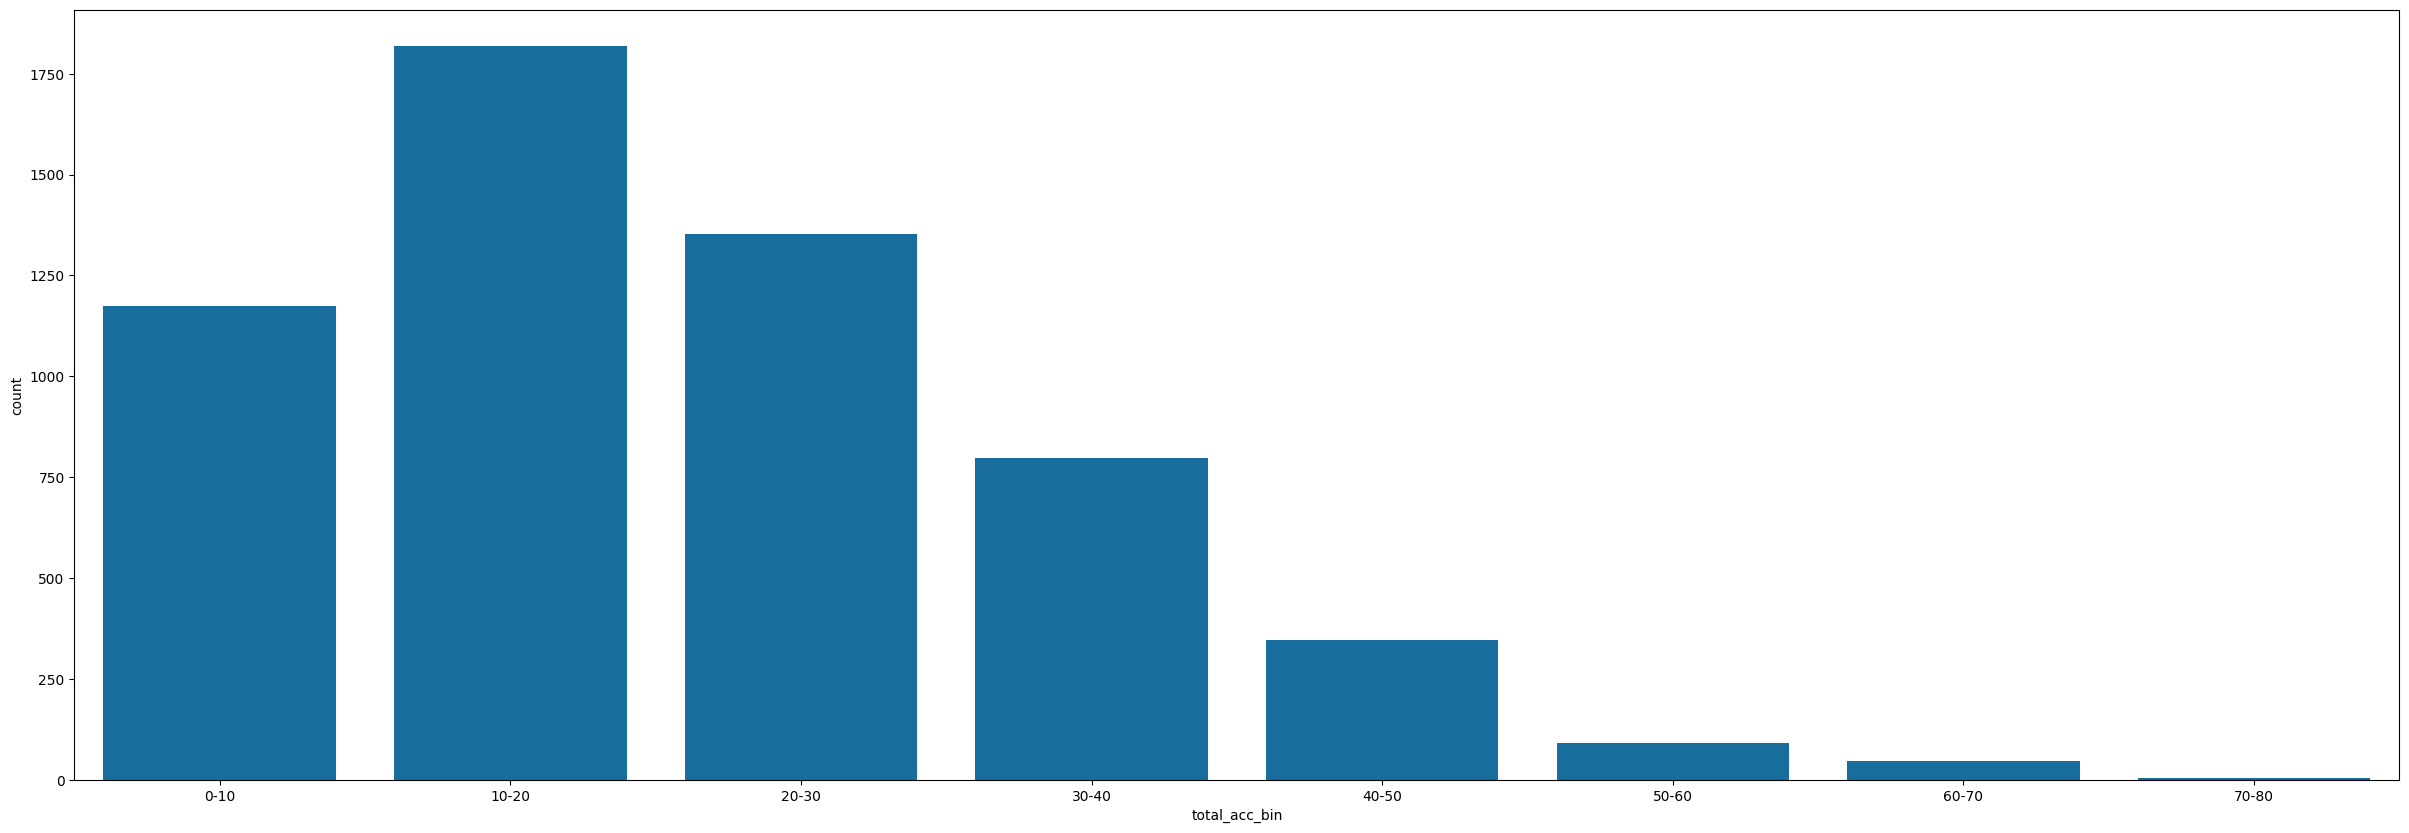

In [32]:
plt.figure(figsize=(30,10))
sns.countplot(x = 'total_acc_bin',data =charged_off_file)
plt.show()